#### Advanced Statistics for Data Science (Spring 2023)
# Home Assignment 2
#### Topics:
- Probability review
- Solving LS using SVD
- Distributional Properties of the Linear Model


#### Due: 09/05/2023 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $3Z_1-Z_2+Z_3-Z_4$ is independent of $Z_1 + Z_2 - Z_3 + Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = a^\topZ$ and $Y = B^\topZ$ for a non-random vectors $a \in \reals^n$ and a non-random matrix $B \in \reals^{n \times p}$. Find conditions on $a$ and $B$ such that $X$ is independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & -.25 \\
-.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivariate normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a scatter plot.

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 2x \leq y \leq 3\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. Evaluating the integral over the Gaussian density function **numerically**. Set the number of grid points $G$ in every axis to be at least $500$.
    2. Estimating the fraction of samples in 4 that falls in the region $A$


#### 4. Answer

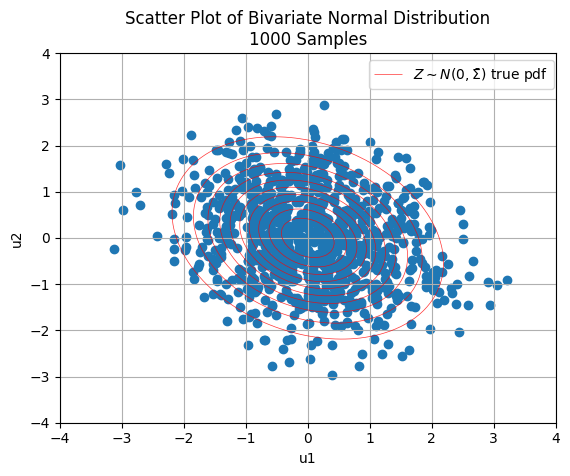

In [3]:
# Define the variance-covariance matrix Σ̄
sigma_bar = np.array(
    [[1, -0.25],
     [-0.25, 1]]
)

N = 1000
Z = np.random.randn(N, 2)
s, V = np.linalg.eigh(sigma_bar)
B = np.sqrt(s) * V 
U = Z @ B.T    # U=BZ -> U ~ N(Bmu, BBt) = N(0, sigma_bar)    


u1, u2 = U[:, 0], U[:, 1]

plt.scatter(u1, u2)
x_grid, y_grid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
pos = np.dstack((x_grid, y_grid))
true_density = multivariate_normal([0, 0], sigma_bar)
density_values = true_density.pdf(pos)

# Overlay the contour plot of the true density function
cnt = plt.contour(x_grid, y_grid, density_values, colors='red', linewidths=0.5, alpha=0.8, levels=10)
artists, labels = cnt.legend_elements()

plt.xlabel('u1')
plt.ylabel('u2')
plt.title(f'Scatter Plot of Bivariate Normal Distribution\n{N} Samples')
plt.legend(artists, ['$Z\sim{N(0,Σ̄)}$ true pdf'], bbox_to_anchor=[1.01, 1], loc='upper right')
plt.grid(True)
plt.show()


#### 5. Answer

In [4]:
def estimate_probability(true_density, x_boundries, y_boundries):
    # Define the limits of integration
    x_lower, x_upper = x_boundries
    y_lower, y_upper = y_boundries

    # Number of grid points in each axis
    G = 500

    # Step sizes
    dx = (x_upper - x_lower) / G
    dy = np.zeros(G)

    total_prob = 0

    # Iterate over grid points
    for i in range(G):
        x = x_lower + i * dx
        dy[i] = (y_upper(x) - y_lower(x)) / G

        for j in range(G):
            y = y_lower(x) + j * dy[i]

            # Calculate the PDF at the current grid point
            pdf = true_density.pdf([x, y])

            # Multiply by the area element and add to total_prob
            total_prob += pdf * dx * dy[i]

    return total_prob

# Estimate the probability
estimated_probability = estimate_probability(
    true_density=true_density,
    x_boundries=(0,1),
    y_boundries=(lambda x: 2 * x, lambda x: 3)

)
print("Estimated probability according to numerical integration:", estimated_probability)


Estimated probability according to numerical integration: 0.06452842650958482


In [5]:
x_in_limits = np.logical_and(0<=u1, u1<=1)
y_in_limits = np.logical_and(2*u1<=u2, u2<=3)
samples_in_A = U[np.logical_and(x_in_limits, y_in_limits)]
print('Estimated probability according to samples ratio', samples_in_A.shape[0]/len(U))


Estimated probability according to samples ratio 0.081


## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$

For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & -1 & 3 \\
 -1 & 2 & -3 \\
 3 & -3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=4, X=3)$
<hr>
<hr>

In [56]:
def sample_from_distribution(mean, cov, n_samples):
    # Generate samples from the multivariate normal distribution
    samples = np.random.multivariate_normal(mean, cov, n_samples)
    return samples

# Given mean and covariance matrix
mean = np.array([1, 2, 3])
cov = np.array(
    [[4 ,-1, 3],
    [-1, 2, -3],
    [3, -3, 8]]
)

# Number of samples to generate
n_samples = 10**8
rtol = 1e-3
# Generate samples from the distribution
samples = sample_from_distribution(mean, cov, n_samples)

# 1. Distribution of X|Y=1
y_equal_1_samples = samples[np.isclose(samples[:, 1],1, rtol=rtol)]
x_given_y_1 = y_equal_1_samples[:, 0]
x_given_y_1_mean = np.mean(x_given_y_1)
x_given_y_1_std = np.std(x_given_y_1)
print("Pr(X|Y=1):")
print("Mean:", x_given_y_1_mean)
print("Standard Deviation:", x_given_y_1_std)
print("\n***********************\n")

# 2. Joint distribution of X,Y|Z=1
z_equal_1_samples = samples[np.isclose(samples[:, 2], 1, rtol=rtol)]
joint_distribution_z_1 = z_equal_1_samples[:, :2]
joint_z_1_mean = np.mean(joint_distribution_z_1, axis=0)
cov_joint_z_1 = np.cov(joint_distribution_z_1.T)
print("Pr(X,Y|Z=1):")
print("Mean:", joint_z_1_mean)
print("Covariance Matrix:")
print(cov_joint_z_1)
print("\n***********************\n")

# 3. Distribution of Y|Z=2,X=3
z_equal_2_x_equal_3_samples = samples[np.isclose(samples[:, 0], 3, rtol=rtol) & np.isclose(samples[:, 2], 2, rtol=rtol)]
y_given_z_2_x_3 = z_equal_2_x_equal_3_samples[:, 1]
y_given_z_2_x_3_mean = np.mean(y_given_z_2_x_3)
y_given_z_2_x_3_std = np.std(y_given_z_2_x_3)
print("Pr(Y|Z=2,X=3):")
print("Mean:", y_given_z_2_x_3_mean)
print("Standard Deviation:", y_given_z_2_x_3_std)
print("\n***********************\n")

# 4. Pr(Y∈[-1, 1]|Z=4, X=3)
z_equal_4_x_equal_3_samples = samples[np.isclose(samples[:, 0], 3, rtol=rtol) & np.isclose(samples[:, 2], 4, rtol=rtol)]
y_given_z_4_x_3 = z_equal_4_x_equal_3_samples[:, 1]
prob_y_in_interval = np.mean((y_given_z_4_x_3 >= -1) & (y_given_z_4_x_3 <= 1))
print("Pr(Y∈[-1, 1]|Z=4,X=3):", prob_y_in_interval)


Pr(X|Y=1):
Mean: 1.4876316740248732
Standard Deviation: 1.860886888291997

***********************

Pr(X,Y|Z=1):
Mean: [0.25369399 2.74289575]
Covariance Matrix:
[[2.91501679 0.13799987]
 [0.13799987 0.88820415]]

***********************

Pr(Y|Z=2,X=3):
Mean: 2.3829375073975343
Standard Deviation: 0.6363572082320239

***********************

Pr(Y∈[-1, 1]|Z=4,X=3): 0.19801980198019803


## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \simiid N(0, 1)$.
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. (bonus) Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (The point: we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


## Problem 4 (Model fitting, t- and F-Tests)
Consider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [61]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !mkdir house-prices
# !unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [191]:
import pandas as pd

data_raw = pd.read_csv("data/house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [192]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 

4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>

In [193]:
from typing import NamedTuple

RegressionOutputs = NamedTuple('RegressionOutputs', [
    ('Z', np.ndarray),
    ('beta', np.ndarray),
    ('pred', np.ndarray),
    ('residuals', np.ndarray),
    ('R2', float)
])

def calc_R2(y, y_hat):
    residuals = y - y_hat
    SSR = residuals.T @ residuals
    SST = (y - y.mean()).T @ (y - y.mean())
    R2 = 1 - SSR / SST
    return R2, residuals

def fit_linear_regression(Z, y, bias=True, evaluate=True):
    if bias:
        Z = np.hstack((np.ones((Z.shape[0], 1)), Z))
    b_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y
    y_hat = Z @ b_hat

    if evaluate:
        R2, residuals = calc_R2(y, y_hat)
    else:
        R2, residuals = None, None
    
    return RegressionOutputs(Z, b_hat, y_hat, residuals, R2)

In [194]:
y = data['SalePrice'].values
Z = data[feat_set1].values

res = fit_linear_regression(Z, y, bias=True, evaluate=True)
print("R2:", res.R2)

R2: 0.7890359748681974


p-value for B_0 to = 0: 0.501090466872367
p-value for B_1 to = 0: 2.917552828509815e-32
p-value for B_2 to = 0: 0.0004280958590292184
p-value for B_3 to = 0: 0.6930049153901889
p-value for B_4 to = 0: 0.32096987418072903
p-value for B_5 to = 0: 3.6101040016105694e-13
p-value for B_6 to = 0: 2.6112020917927194e-33
p-value for B_7 to = 0: 1.647863046462773e-05
p-value for B_8 to = 0: 2.894251581130198e-116


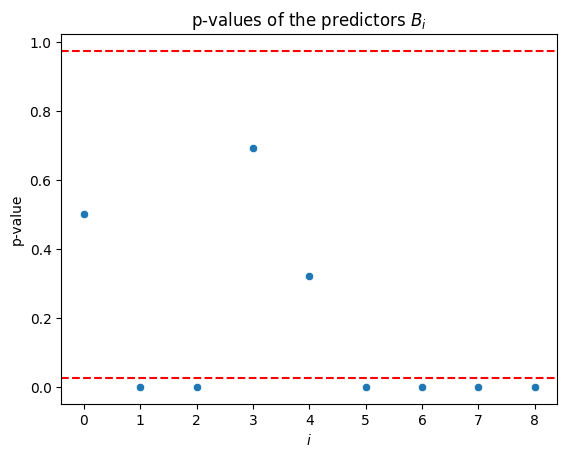

In [195]:
from scipy.stats import t
import seaborn as sns

def calcualte_predictors_significance(res):
    Z = res.Z
    p_values = []
    for i in range(Z.shape[1]):
        c = np.zeros_like(res.beta)
        c[i] = 1
        n, p = Z.shape  # the DoF of the t-distribution if H0 is true is n-p
        sigma = np.sqrt(np.linalg.norm(res.residuals)**2 / (n - p))
        t_stat = res.beta / (sigma * np.sqrt(c.T @ np.linalg.inv(Z.T @ Z) @ c))

        # calc p-value
        p_val = 1-t.cdf(np.abs(t_stat), n-p) + t.cdf(-np.abs(t_stat), n-p)      # two-tailed test
        print(f"p-value for B_{i} to = 0:", p_val[i])
        p_values.append(p_val[i])
    
    ax = sns.scatterplot(p_values)
    ax.set_title("p-values of the predictors $B_i$")
    ax.set_xlabel("$i$")
    ax.set_ylabel("p-value")
    # plt t-distribution 0.975 and 0.025 quantiles
    ax.axhline(0.025, color='r', linestyle='--')
    ax.axhline(0.975, color='r', linestyle='--')

    return p_values

pvalues = calcualte_predictors_significance(res)



we see that $\beta_0, \beta_3, \beta_4$ are the only predictiors for which we do not reject $H_0:\beta_j = 0$
So, we deduce that $\beta_0, \beta_3, \beta_4 = 0$

In [196]:
y = data['SalePrice'].values
Z = data[['LotArea',  'YearBuilt', 'YrSold']].values

res_smaller = fit_linear_regression(Z, y, bias=True, evaluate=True)
print("R2:", res_smaller.R2)

R2: 0.4760585148643631


In [197]:
from scipy.stats import f

def test_smaller_model(res, res_smaller):
    SSE_full = np.linalg.norm(res.residuals)**2
    SSE_smaller = np.linalg.norm(res_smaller.residuals)**2
    n, p = res.Z.shape
    n, q = res_smaller.Z.shape
    F_stat = ((SSE_smaller - SSE_full) / (p - q)) / (SSE_full / (n - p))
    print("F-statistic:", F_stat)
    # calculate p-value
    p_val = 1-f.cdf(F_stat, p-q, n-p) + f.cdf(-F_stat, p-q, n-p)      # two-tailed test
    print("p-value:", p_val)

test_smaller_model(res, res_smaller)

F-statistic: 394.32983333080364
p-value: 1.1102230246251565e-16


We see that we get a very small p-value, meaning that we reject $H_0: \beta_j=0$ to all $i=4,...,9$

# Problem 5 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']``
plus a constant term. Remove all entries in which one or more of these predictors is missing.
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 - In which method $R^2$ is smaller?
2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution.

You can use the code below to read and arrange the data

In [198]:
import pandas as pd
import numpy as np

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("data/house-prices/train.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

In [210]:
lr = fit_linear_regression(Z, y, bias=False, evaluate=True)
print("Pseudo Inverse lr R2:", lr.R2)

Pseudo Inverse lr R2: 0.7452057267967916


In [211]:
def fit_lr_svd(Z, y, evaluate=True, eps=1e-6):
    U, s, Vh = np.linalg.svd(Z)
    s_idx = np.argsort(s)[::-1]
    s = s[s_idx]        # sort according to singular values magnitude
    U = U[:, s_idx]     # sort according to singular values magnitude
    Vh = Vh[s_idx, :]   # sort according to singular values magnitude

    y_star = U.T @ y
    beta_star = y_star / s
    beta_star[s/s[0] <= eps] = 0 
    
    beta_hat = Vh.T @ beta_star
    y_hat = Z @ beta_hat

    if evaluate:
        R2, residuals = calc_R2(y, y_hat)
    else:
        R2, residuals = None, None

    return RegressionOutputs(Z, beta_hat, y_hat, residuals, R2)

In [213]:
svd_lr = fit_lr_svd(Z, y)
print('SVD lr R2: ', svd_lr.R2)

SVD lr R2:  0.7445113674228727


The pseudo-inverse solution of the LR problem has a slightly better $R^2$ score (SVD base solution in smaller in $< 0.01$)

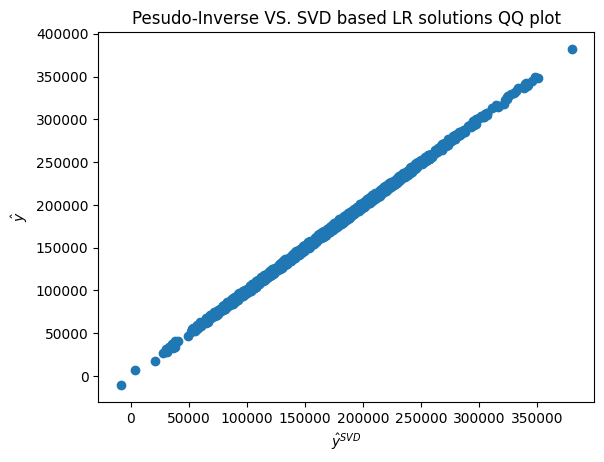

In [232]:
plt.scatter(svd_lr.pred, lr.pred)
plt.xlabel('$\hat{y}^{SVD}$')
plt.ylabel('$\hat{y}$')
plt.title('Pesudo-Inverse VS. SVD based LR solutions QQ plot');

Text(0, 0.5, 'log ratio')

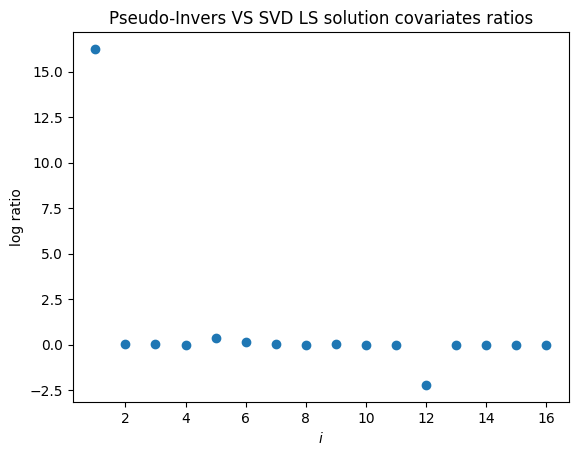

In [256]:
plt.scatter(range(1, lr.beta.shape[0]+1), np.log(np.abs(lr.beta / svd_lr.beta)))
plt.title('Pseudo-Invers VS SVD LS solution covariates ratios')
plt.xlabel('$i$')
plt.ylabel('log ratio');

It seems that $\beta_1$ has the max difference between the two regression models